# Webscraping to Extract Programming_Languages Data

I will use the requests library to download the webpage <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html>. Then I will save the text of the response in a pandas dataframe to be further analysed.


In [24]:
import pandas as pd
from bs4 import BeautifulSoup 
import requests 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inlineI will use the requests library to download the webpage <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html>. Then I will save the text of the response in a pandas dataframe to be further analysed.


In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

data  =requests.get(url).text

The data I will scrape is the **name of the programming language** and **average annual salary**.

In [10]:
soup = BeautifulSoup(data, "html.parser")

In [11]:
#find all html tables in the web page
tables = soup.find_all('table')

In [12]:
# we can see how many tables were found by checking the length of the tables list
print('Number of tables: ',len(tables))

Number of tables:  1


In [13]:
print('All the tables: ', pd.read_html(str(tables), flavor='bs4'))

All the tables:  [      0           1                                          2  \
0   No.    Language                                 Created By   
1     1      Python                           Guido van Rossum   
2     2        Java                              James Gosling   
3     3           R               Robert Gentleman, Ross Ihaka   
4     4  Javascript                                   Netscape   
5     5       Swift                                      Apple   
6     6         C++                          Bjarne Stroustrup   
7     7          C#                                  Microsoft   
8     8         PHP                             Rasmus Lerdorf   
9     9         SQL    Donald D. Chamberlin, Raymond F. Boyce.   
10   10          Go  Robert Griesemer, Ken Thompson, Rob Pike.   

                        3                    4  
0   Average Annual Salary  Learning Difficulty  
1                $114,383                 Easy  
2                $101,013                 

In [16]:
#FINAL pandas Dataframe of the Table:
df = pd.read_html(str(tables[0]), flavor='bs4', header=0)[0] 

df.head()

,No.,Language,Created By,Average Annual Salary,Learning Difficulty
0,1,Python,Guido van Rossum,"$114,383",Easy
1,2,Java,James Gosling,"$101,013",Easy
2,3,R,"Robert Gentleman, Ross Ihaka","$92,037",Hard
3,4,Javascript,Netscape,"$110,981",Easy
4,5,Swift,Apple,"$130,801",Easy


In [18]:
df_sub= df[['Language','Average Annual Salary']]
df_sub


,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [19]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Language               10 non-null     object
 1   Average Annual Salary  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [20]:
df_sub['Average Annual Salary'] = df_sub['Average Annual Salary'].str.replace('$', '').str.replace(',', '')
df_sub

C:\Users\Marco\AppData\Local\Temp\ipykernel_3220\1011142086.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sub['Average Annual Salary'] = df_sub['Average Annual Salary'].str.replace('$', '').str.replace(',', '')
C:\Users\Marco\AppData\Local\Temp\ipykernel_3220\1011142086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Average Annual Salary'] = df_sub['Average Annual Salary'].str.replace('$', '').str.replace(',', '')


,Language,Average Annual Salary
0,Python,114383
1,Java,101013
2,R,92037
3,Javascript,110981
4,Swift,130801
5,C++,113865
6,C#,88726
7,PHP,84727
8,SQL,84793
9,Go,94082


In [21]:
df_sub['Average Annual Salary'] = df_sub['Average Annual Salary'].astype(int)
df_sub

C:\Users\Marco\AppData\Local\Temp\ipykernel_3220\3306797433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Average Annual Salary'] = df_sub['Average Annual Salary'].astype(int)


,Language,Average Annual Salary
0,Python,114383
1,Java,101013
2,R,92037
3,Javascript,110981
4,Swift,130801
5,C++,113865
6,C#,88726
7,PHP,84727
8,SQL,84793
9,Go,94082


In [22]:
df_sub = df_sub.sort_values(by= 'Average Annual Salary', ascending=False)
df_sub

,Language,Average Annual Salary
4,Swift,130801
0,Python,114383
5,C++,113865
3,Javascript,110981
1,Java,101013
9,Go,94082
2,R,92037
6,C#,88726
8,SQL,84793
7,PHP,84727


<AxesSubplot:xlabel='Language', ylabel='Average Annual Salary'>

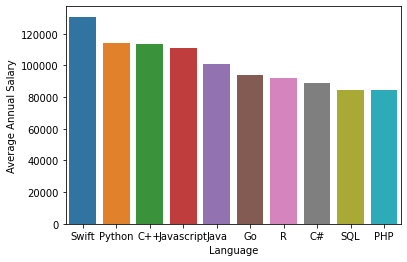

In [26]:
sns.barplot(x='Language',y='Average Annual Salary',data=df_sub)

I will save the scrapped data into a file named *popular-languages.csv*


In [11]:
df.to_csv('popular-languages.csv',index=False)